# Controlled Add-or-Subtract

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ControlledAddOrSubtract`
Adds or subtracts in-place into the target, based on a control bit.

Applies the transformation

$$
    |1\rangle |a\rangle |b\rangle \mapsto |1\rangle |a\rangle |b + a\rangle \\
    |0\rangle |a\rangle |b\rangle \mapsto |0\rangle |a\rangle |b - a\rangle
$$

Given two numbers `a`, `b` and a control bit `ctrl`, this bloq computes:

- the sum `b + a` when `ctrl=1`,
- the difference `b - a` when `ctrl=0`,

and stores the result in the second register (`b`).

This uses an uncontrolled `Add` surrounded by controlled `BitwiseNot`s, and only
the `Add` requires T gates, which has half the T-cost of a controlled `Add`.


#### Parameters
 - `a_dtype`: dtype of the lhs `a`
 - `b_dtype`: dtype of the rhs `b`. If it is not big enough to store the result, the most significant bits are dropped on overflow.
 - `add_when_ctrl_is_on`: If True (default), add when `ctrl=1` and subtract when `ctrl=0`. If False, do the opposite: subtract when `ctrl=0` and add when `ctrl=1`. 

#### Registers
 - `ctrl`: a single control bit
 - `a`: an integer value.
 - `b`: an integer value. 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/abs/2007.07391). Sanders et. al. Section II-A-1, Algorithm 1.


In [2]:
from qualtran.bloqs.arithmetic.controlled_add_or_subtract import ControlledAddOrSubtract

### Example Instances

In [3]:
ctrl_add_or_sub_unsigned = ControlledAddOrSubtract(QUInt(8), QUInt(8))

In [4]:
ctrl_add_or_sub_signed = ControlledAddOrSubtract(QInt(8), QInt(8))

In [5]:
import sympy

n = sympy.Symbol("n")
ctrl_add_or_sub_signed_symb = ControlledAddOrSubtract(QInt(n), QInt(n))

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([ctrl_add_or_sub_signed_symb, ctrl_add_or_sub_unsigned, ctrl_add_or_sub_signed],
           ['`ctrl_add_or_sub_signed_symb`', '`ctrl_add_or_sub_unsigned`', '`ctrl_add_or_sub_signed`'])

### Call Graph

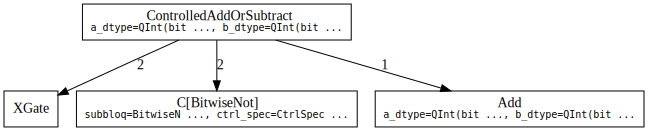

#### Counts totals:
 - `Add`: 1
 - `C[BitwiseNot]`: 2
 - `XGate`: 2

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
ctrl_add_or_sub_signed_symb_g, ctrl_add_or_sub_signed_symb_sigma = ctrl_add_or_sub_signed_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ctrl_add_or_sub_signed_symb_g)
show_counts_sigma(ctrl_add_or_sub_signed_symb_sigma)